<a class="anchor" id="0.1"></a>
# **Table of Contents**
1. [Introduction](#1)
2. [Business Understanding](#2)
3. [Data Understanding](#3)
4. [Data Preperation](#4)
5. [Modeling](#5)
6. [Evaluation](#6)
7. [Improvements](#7)

# **1. Introduction** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

This notebook will explore Feedforward Neural Networks by going through the CRISP-DM process. The goal is to gain insight into how to use FNN in Python.

### Feedforward Neural Networks

Feedforward Neural Networks (FNNs) are a type of neural network where the connection between nodes do not form any cycle. Information moves forward, from the input nodes, through the hidden nodes, to the output nodes. The following is the typical process of a FNN:

**1. Forward Pass**

Input data is fed into the input layer. Each neuron passes its signal forward to all neurons in the hidden layer. Each connection between neurons has an associated weight that determines the strength of the connection.

**2. Activation Function**

At each neuron in the hidden layer, the weighed sum of inputs is calculated, and then an activation function is applied. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).

**3. Propagation**

The output of each neuron becomes the input of the neurons in the next layer. This process continues until the output layer is reached.

**4. Output**

The output layer represents the predictions or classifications made by the neural network based on the input data.

**5. Error Calculation and Backpropagation**

The network's output is compared to the actual actual target value, and the error is calculated.

# **2. Business Understanding** <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

The dataset I will be using for this notebook is the [Phishing Url](https://www.kaggle.com/datasets/hemanthpingali/phishing-url?resource=download). I will be attempting to train a neural network to identify phishing urls.

The dataset contains various features extracted from the urls including length, presence of elements (IP, TLDs), content-related attributes, technical indicators, and others. Altogether there are 87 such attributes in the dataset.


# **3. Data Understanding** <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

We will now explore our dataset to understand the data we are working with. Our data is stored in a .parquet file, so we'll want to convert it to a .csv file.

In [1]:
# This library will help us access our file
try:
    import os
except:
    !pip install os
    import os
    
# This library is for data processing, and file I/O
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
    
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

# model training libraries
try:
    from sklearn.preprocessing import StandardScaler
except:
    !pip install sklearn
    from sklearn.preprocessing import StandardScaler


try:
    from sklearn.model_selection import train_test_split
except:
    !pip install sklearn
    from sklearn.model_selection import train_test_split

try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
except:
    !pip install tensorflow
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense    
    
# Eval libraries
try:
    from sklearn.metrics import accuracy_score
except:
    !pip install sklearn
    from sklearn.metrics import accuracy_score
    
try:
    from sklearn.metrics import confusion_matrix
except:
    !pip install sklearn
    from sklearn.metrics import confusion_matrix

try:
    from sklearn.metrics import classification_report
except:
    !pip install sklearn
    from sklearn.metrics import classification_report

# visualize confusion matrix with seaborn heatmap
try:
    import seaborn as sns # for statistical data visualization
except:
    !pip install seaborn
    import seaborn as sns # for statistical data visualization

try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\alexa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
current_working_directory = os.getcwd()
file = r'\input\phishingURL.parquet' #this directory may differ for you
data = current_working_directory + file

# convert to a csv
df = pd.read_parquet(data)
df.to_csv(current_working_directory + r'\input\phishingURL.csv') 

# read the new csv
data = current_working_directory + r'\input\phishingURL.csv'
df = pd.read_csv(data)

In [3]:
df.shape

(3772, 90)

We can see that there are 3772 instances, and 90 attributes, which is more than what we were expecting from business understanding. Let's look at the columns and determine what we are working with.

In [4]:
df.head()

,Unnamed: 0,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,https://clubedemilhagem.com/home.php,36,19,0,2,0,0,0,0,...,1,0,0,344,21,0,0,1,0,phishing
1,1,http://www.medicalnewstoday.com/articles/18893...,51,24,0,3,0,0,0,0,...,1,1,0,103,6106,737,0,1,6,legitimate
2,2,https://en.wikipedia.org/wiki/NBC_Nightly_News,46,16,0,2,0,0,0,0,...,0,1,0,901,7134,12,0,0,7,legitimate
3,3,http://secure.web894.com/customer_center/custo...,185,17,1,2,1,0,1,2,...,1,1,0,247,1944,0,0,1,0,phishing
4,4,https://en.wikipedia.org/wiki/Transaction_proc...,52,16,0,2,0,0,0,0,...,0,1,0,901,7134,12,0,0,7,legitimate


Here we can see that from our 90 columns, two are indices (first and second), and the third is the url, meaning that the remaining 87 columns match our expected attributes. We can drop the extra indice column during our data preperation phase, since they won't be necessary to train our model. We can also drop the url column, as the rest of the attributes are data about the url, which is what we want to use to make our prediction.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3772 non-null   int64  
 1   url                         3772 non-null   object 
 2   length_url                  3772 non-null   int64  
 3   length_hostname             3772 non-null   int64  
 4   ip                          3772 non-null   int64  
 5   nb_dots                     3772 non-null   int64  
 6   nb_hyphens                  3772 non-null   int64  
 7   nb_at                       3772 non-null   int64  
 8   nb_qm                       3772 non-null   int64  
 9   nb_and                      3772 non-null   int64  
 10  nb_or                       3772 non-null   int64  
 11  nb_eq                       3772 non-null   int64  
 12  nb_underscore               3772 non-null   int64  
 13  nb_tilde                    3772 

Here we can see that we have no missing values for our 3772 records.

### Explore Categorical Variables

In [6]:
# identify categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables\n')
print(f'The categorical variables are: {categorical}')

There are 2 categorical variables

The categorical variables are: ['url', 'status']


### Explore Numerical Variables

In [7]:
# identify numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print(f'There are {len(numerical)} numerical variables\n')
print(f'The numerical variables are: {numerical}')

There are 88 numerical variables

The numerical variables are: ['Unnamed: 0', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperli

# **4. Data Preperation** <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

During the Data Understanding phase, we noticed there were some unecessary columns in our dataset. We will drop the first two columns, as they won't helpful for us to train our model.

In [8]:
df.drop(df.columns[:2], inplace=True, axis=1)
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,36,19,0,2,0,0,0,0,0,0,...,1,0,0,344,21,0,0,1,0,phishing
1,51,24,0,3,0,0,0,0,0,0,...,1,1,0,103,6106,737,0,1,6,legitimate
2,46,16,0,2,0,0,0,0,0,0,...,0,1,0,901,7134,12,0,0,7,legitimate
3,185,17,1,2,1,0,1,2,0,3,...,1,1,0,247,1944,0,0,1,0,phishing
4,52,16,0,2,0,0,0,0,0,0,...,0,1,0,901,7134,12,0,0,7,legitimate


Now we want to extract our target variable from the dataset.

In [9]:
target_variable = 'status'

X_target = df.drop([target_variable], axis=1)

y = df[target_variable]
df.drop([target_variable], inplace=True, axis=1)

Next we want to scale our values to ensure all attributes contribute equally to the model's training.

In [10]:
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,36,19,0,2,0,0,0,0,0,0,...,0,1,0,0,344,21,0,0,1,0
1,51,24,0,3,0,0,0,0,0,0,...,0,1,1,0,103,6106,737,0,1,6
2,46,16,0,2,0,0,0,0,0,0,...,0,0,1,0,901,7134,12,0,0,7
3,185,17,1,2,1,0,1,2,0,3,...,0,1,1,0,247,1944,0,0,1,0
4,52,16,0,2,0,0,0,0,0,0,...,0,0,1,0,901,7134,12,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,34,26,0,2,0,0,0,0,0,0,...,0,0,0,0,373,6202,7701846,0,0,5
3768,54,14,0,2,0,0,0,0,0,0,...,0,1,1,0,139,6071,14420,0,0,5
3769,25,16,0,2,0,0,0,0,0,0,...,0,0,0,0,238,5971,402341,0,0,3
3770,550,25,1,5,24,0,1,9,0,10,...,0,1,1,0,349,6591,30,0,1,4


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=X, columns=df.columns)
df_scaled.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.530043,-0.192143,-0.428870,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,...,-0.37083,0.545898,-0.890858,-0.27377,-0.200046,-1.303867,-0.427241,-0.135494,0.917005,-1.255602
1,-0.216023,0.229918,-0.428870,0.365720,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,...,-0.37083,0.545898,1.122513,-0.27377,-0.538596,0.650155,-0.426863,-0.135494,0.917005,1.119788
2,-0.320696,-0.445380,-0.428870,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,...,-0.37083,-1.831846,1.122513,-0.27377,0.582413,0.980268,-0.427235,-0.135494,-1.090507,1.515686
3,2.589220,-0.360967,2.331708,-0.374353,0.006538,-0.151506,2.391141,2.310396,0.0,2.843696,...,-0.37083,0.545898,1.122513,-0.27377,-0.336309,-0.686351,-0.427241,-0.135494,0.917005,-1.255602
4,-0.195088,-0.445380,-0.428870,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,...,-0.37083,-1.831846,1.122513,-0.27377,0.582413,0.980268,-0.427235,-0.135494,-1.090507,1.515686


Now that our data is scaled, we want to split our dataset into a training and testing set. Our testing set will allow us to test our model's accuracy.

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

# encode the training sets
y_train = (y_train == 'legitimate').astype(int)
y_test = (y_test == 'legitimate').astype(int)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2640, 87) (2640,)
Test set: (1132, 87) (1132,)


# **5. Modeling** <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

Our data is ready to train our model. In this notebook, we will be using tenserflow to train our model. Neural Network models consists of an input layer, hidden layer, and output layer. We will define each layer, and add them to our model.

In [13]:
fnn_model = Sequential()

# input layer neruons count equal to number of features and ReLU activation
input_layer = Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu')

# hidden layer with 64 neurons for the first, and 32 for the second, and ReLU activation
hidden_layer_one = Dense(64, activation = 'relu')
hidden_layer_two = Dense(32, activation = 'relu')

# output layer with 1 neuron and sigmoid activation (binary classification)
output_layer = Dense(1, activation='sigmoid')

# add the layers to the model
fnn_model.add(input_layer)
fnn_model.add(hidden_layer_one)
fnn_model.add(hidden_layer_two)
fnn_model.add(output_layer)

# compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\alexa\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# train the model
fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.4343 - val_accuracy: 0.9284 - val_loss: 0.1779
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9432 - loss: 0.1573 - val_accuracy: 0.9382 - val_loss: 0.1549
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9670 - loss: 0.1064 - val_accuracy: 0.9382 - val_loss: 0.1648
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.9646 - loss: 0.1044 - val_accuracy: 0.9435 - val_loss: 0.1453
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9669 - loss: 0.0852 - val_accuracy: 0.9452 - val_loss: 0.1447
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9771 - loss: 0.0702 - val_accuracy: 0.9435 - val_loss: 0.1532
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9778 - loss: 0.0645 - val_accuracy: 0.9337 - val_loss: 0.2008
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9853 - loss: 0.0514 - val_accuracy: 0.94

In [15]:
y_pred = fnn_model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int) # round probabilities to get binary labels

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


# **6. Evaluation** <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

In [16]:
y_pred_train = fnn_model.predict(X_train)
y_pred_train = (y_pred_train >= 0.5).astype(int) # round probabilities to get binary labels
    
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
Model accuracy score: 0.9496
Training-set accuracy score: 0.9932


The trainin-set accuracy score is 0.9440 while the test-set accuracy is 0.9947. The two values differ by about 5%, which indicates there is little overfitting in the model.

In [17]:
# return the most frequent value
most_frequent = (y_test == 0).sum() if (y_test == 0).sum() >= (y_test == 1).sum() else (y_test == 1).sum()

null_accuracy = most_frequent/len(y_test)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5044


Our model accuracy score is 0.9470 while our null accuracy is 0.5044. Having a model accuracy score that is higher than the null accuracy is indicative that our model is doing a good job at predicting the classes.

### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [18]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[536  25]
 [ 32 539]]

True Positives(TP) =  536

True Negatives(TN) =  539

False Positives(FP) =  25

False Negatives(FN) =  32


The confusion matrix shows `545 + 527 = 1072 correct predictions` and `16 + 44 = 60 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 545


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 527


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 16 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 44 `(Type II error)`

<AxesSubplot:>

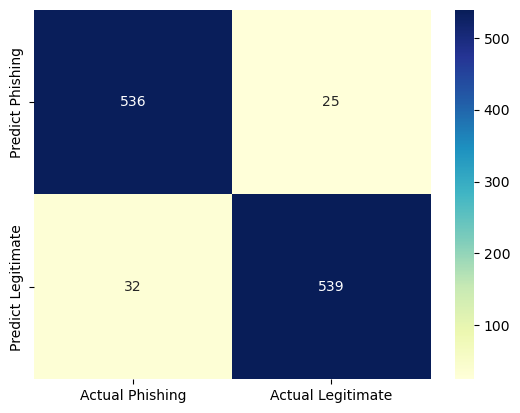

In [19]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Phishing', 'Actual Legitimate'], 
                                 index=['Predict Phishing', 'Predict Legitimate'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model.

We can print a classification report as follows:-
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       561
           1       0.96      0.94      0.95       571

    accuracy                           0.95      1132
   macro avg       0.95      0.95      0.95      1132
weighted avg       0.95      0.95      0.95      1132



### Accuracy
**Accuracy** measures the overall correctness of the predictions. It is a general indicator of how well the model is performing.

Mathematically, accuracy can be defined as the ratio of `(TP + FP) to (TP + FP + FN + TN)`

### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

### Specificity

**Specificity** represents the propertion of correctly identified actual negatives. It helps us understand how well the model can idenitfy instances that don't belong the the positive class. High specificity is indicative that the model is good at avoiding false positives. Low specificity is indicative that the model is misclassifying negative instances as positive.

Mathematically, specificity can be given as the ratio of `TN to (TN + FP)`

### Negative Predictive Value (NPV)
**NPV** asses the likelihood that a negative prediction is correct. High NPV indicates the model is correctly idenitfying true negatives. Low NPV indicates the model is missclassifying negative instances.

Mathematically, NPV can be given as the ratio of `TN to (TN + FN)`

### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.

Mathematically, f1-score can be given by the following formula: `2 x (Percision x Recall)/(Precision + Recall)`

#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [21]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 0.9496
Precision : 0.9554
Recall: 0.9437
Specificity : 0.9557
NPV: 0.9440
F1 Score: 0.9495
Balanced Accuracy: 0.9497


# **7. Improvements** <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

Now that we've evaluated our model, we can reflect on our result and see if there are any improvements to be made.

Given our results of `94.7%`, we can conclude that our model is exceedingly well trained to accurately predicts if urls are legitimate or phishing. From this point forward, our goal would be to try and train the model on fewer attributes to see if we can maintain accuracy with less data. 87 attributes is a lot of attributes to make predictions, and it would be more useful for our use-case to reduce the number of attributes, especially if we can maintain a high level of accuracy.

If we want to implement this model in a useful way in the future, it is easier for us to work with attributes that are easily obtainable from the url. Such attributes include the following:

- length_url
- length_hostname
- nb_dots
- nb_hyphens
- nb_at
- nb_qm
- nb_and
- nb_or
- nb_eq
- nb_underscore
- nb_tilde
- nb_percent
- nb_slash
- nb_star
- nb_colon
- nb_comma
- nb_semicolumn
- nb_dollar
- nb_space
- nb_www
- nb_com
- nb_dslash
- http_in_path
- nb_subdomains

These attributes can be directly derives from the url string, making them especially useful in a real-world application of our model if we can train it accurately on just these attributes. This would also bring our total attributes down from 87 to 24, meaning we need less data to make predictions.

In [22]:
current_working_directory = os.getcwd()
file = r'\input\phishingURL.parquet' #this directory may differ for you
data = current_working_directory + file

# convert to a csv
df = pd.read_parquet(data)
df.to_csv(current_working_directory + r'\input\phishingURL.csv') 

# read the new csv
data = current_working_directory + r'\input\phishingURL.csv'
df = pd.read_csv(data)

In [23]:
cols_to_keep = ["length_url", "length_hostname", "nb_dots", "nb_hyphens", "nb_at", "nb_qm", 
                "nb_and", "nb_or", "nb_eq", "nb_underscore", "nb_tilde", "nb_percent", "nb_slash", 
                "nb_star", "nb_colon", "nb_comma", "nb_semicolumn", "nb_dollar", "nb_space", "nb_www", 
                "nb_com", "nb_dslash", "http_in_path", "nb_subdomains", "status"]

# Filter out columns not present in the column_names list
columns_to_keep = [col for col in df.columns if col in cols_to_keep]

# Drop columns not present in the column_names list
df = df[cols_to_keep]
df

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,...,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,nb_subdomains,status
0,36,19,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,phishing
1,51,24,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3,legitimate
2,46,16,2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,2,legitimate
3,185,17,2,1,0,1,2,0,3,2,...,0,2,0,0,0,0,0,0,2,phishing
4,52,16,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,34,26,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,legitimate
3768,54,14,2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,2,legitimate
3769,25,16,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,legitimate
3770,550,25,5,24,0,1,9,0,10,7,...,0,0,0,1,0,1,0,1,3,legitimate


In [24]:
# select our target variable
target_variable = 'status'

X_target = df.drop([target_variable], axis=1)

y = df[target_variable]
df.drop([target_variable], inplace=True, axis=1)
df

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,...,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,nb_subdomains
0,36,19,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1,51,24,3,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,3
2,46,16,2,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,0,2
3,185,17,2,1,0,1,2,0,3,2,...,1,0,2,0,0,0,0,0,0,2
4,52,16,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,34,26,2,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2
3768,54,14,2,0,0,0,0,0,0,2,...,2,0,0,0,0,0,0,0,0,2
3769,25,16,2,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2
3770,550,25,5,24,0,1,9,0,10,7,...,2,0,0,0,1,0,1,0,1,3


In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=X, columns=df.columns)
df_scaled

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,...,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,nb_subdomains
0,-0.530043,-0.192143,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,-0.302916,...,-0.113788,-0.036066,-0.110157,-0.030908,-0.117777,-0.887584,-0.35201,-0.080021,-0.092661,-0.389207
1,-0.216023,0.229918,0.365720,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,-0.302916,...,-0.113788,-0.036066,-0.110157,-0.030908,-0.117777,1.107629,-0.35201,-0.080021,-0.092661,1.182621
2,-0.320696,-0.445380,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,1.650244,...,-0.113788,-0.036066,-0.110157,-0.030908,-0.117777,-0.887584,-0.35201,-0.080021,-0.092661,-0.389207
3,2.589220,-0.360967,-0.374353,0.006538,-0.151506,2.391141,2.310396,0.0,2.843696,1.650244,...,-0.113788,-0.036066,3.227304,-0.030908,-0.117777,-0.887584,-0.35201,-0.080021,-0.092661,-0.389207
4,-0.195088,-0.445380,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,0.673664,...,-0.113788,-0.036066,-0.110157,-0.030908,-0.117777,-0.887584,-0.35201,-0.080021,-0.092661,-0.389207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,-0.571912,0.398743,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,-0.302916,...,-0.113788,-0.036066,-0.110157,-0.030908,-0.117777,1.107629,-0.35201,-0.080021,-0.092661,-0.389207
3768,-0.153219,-0.614204,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,1.650244,...,4.655183,-0.036066,-0.110157,-0.030908,-0.117777,-0.887584,-0.35201,-0.080021,-0.092661,-0.389207
3769,-0.760324,-0.445380,-0.374353,-0.458789,-0.151506,-0.384054,-0.211981,0.0,-0.307427,-0.302916,...,-0.113788,-0.036066,-0.110157,-0.030908,-0.117777,1.107629,-0.35201,-0.080021,-0.092661,-0.389207
3770,10.230366,0.314330,1.845867,10.709067,-0.151506,2.391141,11.138717,0.0,10.196315,6.533142,...,4.655183,-0.036066,-0.110157,-0.030908,2.495487,-0.887584,2.36329,-0.080021,6.760640,1.182621


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# encode the training sets
y_train = (y_train == 'legitimate').astype(int)
y_test = (y_test == 'legitimate').astype(int)

In [27]:
fnn_model = Sequential()

# input layer neruons count equal to number of features and ReLU activation
input_layer = Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu')

# hidden layer with 64 neurons for the first, and 32 for the second, and ReLU activation
hidden_layer_one = Dense(64, activation = 'relu')
hidden_layer_two = Dense(32, activation = 'relu')

# output layer with 1 neuron and sigmoid activation (binary classification)
output_layer = Dense(1, activation='sigmoid')

# add the layers to the model
fnn_model.add(input_layer)
fnn_model.add(hidden_layer_one)
fnn_model.add(hidden_layer_two)
fnn_model.add(output_layer)

# compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\alexa\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6913 - loss: 0.6127 - val_accuracy: 0.7959 - val_loss: 0.4419
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8023 - loss: 0.4285 - val_accuracy: 0.8004 - val_loss: 0.4137
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8106 - loss: 0.3999 - val_accuracy: 0.8065 - val_loss: 0.4029
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8225 - loss: 0.3741 - val_accuracy: 0.8030 - val_loss: 0.4042
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8208 - loss: 0.3924 - val_accuracy: 0.8057 - val_loss: 0.4001
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8315 - loss: 0.3678 - val_accuracy: 0.8083 - val_loss: 0.3988
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8411 - loss: 0.3625 - val_accuracy: 0.8074 - val_loss: 0.3982
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8458 - loss: 0.3485 - val_accuracy: 0.81

We can already see that our accuracy is much lower than our previous model. However, we can train our model for more epochs to improve it's accuracy. Let's rerun our model for longer and see how this improves our accuracy.

In [29]:
fnn_model = Sequential()

# input layer neruons count equal to number of features and ReLU activation
input_layer = Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu')

# hidden layer with 64 neurons for the first, and 32 for the second, and ReLU activation
hidden_layer_one = Dense(64, activation = 'relu')
hidden_layer_two = Dense(32, activation = 'relu')

# output layer with 1 neuron and sigmoid activation (binary classification)
output_layer = Dense(1, activation='sigmoid')

# add the layers to the model
fnn_model.add(input_layer)
fnn_model.add(hidden_layer_one)
fnn_model.add(hidden_layer_two)
fnn_model.add(output_layer)

# compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = fnn_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6916 - loss: 0.6155 - val_accuracy: 0.7588 - val_loss: 0.4870
Epoch 2/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7919 - loss: 0.4505 - val_accuracy: 0.7995 - val_loss: 0.4408
Epoch 3/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8140 - loss: 0.4032 - val_accuracy: 0.8057 - val_loss: 0.4202
Epoch 4/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8323 - loss: 0.3881 - val_accuracy: 0.8083 - val_loss: 0.4166
Epoch 5/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8224 - loss: 0.3827 - val_accuracy: 0.8127 - val_loss: 0.4048
Epoch 6/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8334 - loss: 0.3677 - val_accuracy: 0.8057 - val_loss: 0.4114
Epoch 7/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8297 - loss: 0.3619 - val_accuracy: 0.8127 - val_loss: 0.4018
Epoch 8/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8470 - loss: 0.3416 - val_accura

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8805 - loss: 0.2621 - val_accuracy: 0.8366 - val_loss: 0.4125
Epoch 52/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8706 - loss: 0.2724 - val_accuracy: 0.8313 - val_loss: 0.4261
Epoch 53/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8839 - loss: 0.2457 - val_accuracy: 0.8295 - val_loss: 0.4162
Epoch 54/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8914 - loss: 0.2591 - val_accuracy: 0.8419 - val_loss: 0.4126
Epoch 55/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.8797 - loss: 0.2610 - val_accuracy: 0.8304 - val_loss: 0.4220
Epoch 56/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8716 - loss: 0.2571 - val_accuracy: 0.8339 - val_loss: 0.4171
Epoch 57/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8796 - loss: 0.2602 - val_accuracy: 0.8233 - val_loss: 0.4277
Epoch 58/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8853 - loss: 0.2565 - val_accuracy:

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8881 - loss: 0.2219 - val_accuracy: 0.8198 - val_loss: 0.4802
Epoch 102/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9045 - loss: 0.2027 - val_accuracy: 0.8322 - val_loss: 0.4878
Epoch 103/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.9113 - loss: 0.2073 - val_accuracy: 0.8136 - val_loss: 0.5163
Epoch 104/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8952 - loss: 0.2285 - val_accuracy: 0.8366 - val_loss: 0.4840
Epoch 105/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9043 - loss: 0.2039 - val_accuracy: 0.8269 - val_loss: 0.5016
Epoch 106/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8953 - loss: 0.2238 - val_accuracy: 0.8260 - val_loss: 0.5027
Epoch 107/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9080 - loss: 0.2119 - val_accuracy: 0.8198 - val_loss: 0.4843
Epoch 108/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8970 - loss: 0.2165 - val_ac

Epoch 151/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9146 - loss: 0.1883 - val_accuracy: 0.8322 - val_loss: 0.5696
Epoch 152/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9117 - loss: 0.2014 - val_accuracy: 0.8304 - val_loss: 0.5729
Epoch 153/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.9133 - loss: 0.1882 - val_accuracy: 0.8216 - val_loss: 0.5910
Epoch 154/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9166 - loss: 0.1822 - val_accuracy: 0.8286 - val_loss: 0.5932
Epoch 155/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9211 - loss: 0.1869 - val_accuracy: 0.8313 - val_loss: 0.5765
Epoch 156/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9241 - loss: 0.1778 - val_accuracy: 0.8171 - val_loss: 0.5895
Epoch 157/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9139 - loss: 0.1862 - val_accuracy: 0.8322 - val_loss: 0.5944
Epoch 158/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.9037 - loss: 0

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9293 - loss: 0.1723 - val_accuracy: 0.8092 - val_loss: 0.6023


Running our model for 200 epochs has yielded us an extra 6% in accuracy, bridging the gap between our model with fewer attributes, and our model with more attributes. This means that we can have a model with similar performance and less inputs at the cost of a longer training period.

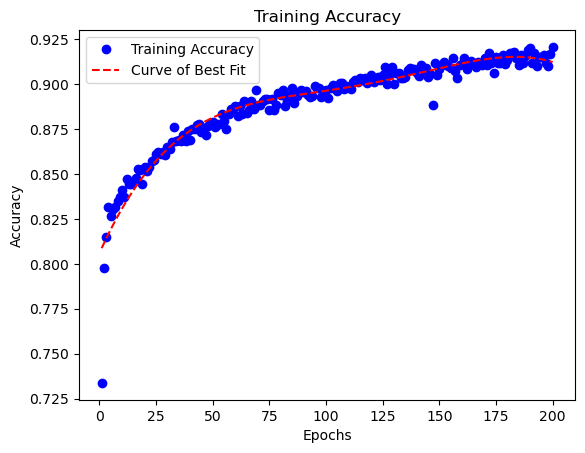

In [44]:
# Extract accuracy values from the training history
train_accuracy = history.history['accuracy']

# Fit a polynomial curve to the training accuracy data points
fit_coefficients = np.polyfit(epochs, train_accuracy, 4)
fit_curve = np.poly1d(fit_coefficients)

# Plot the accuracy over epochs
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, fit_curve(epochs), color='red', linestyle='--', label='Curve of Best Fit')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = fnn_model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int) # round probabilities to get binary labels

In [ ]:
y_pred_train = fnn_model.predict(X_train)
y_pred_train = (y_pred_train >= 0.5).astype(int) # round probabilities to get binary labels
    
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [ ]:
# return the most frequent value
most_frequent = (y_test == 0).sum() if (y_test == 0).sum() >= (y_test == 1).sum() else (y_test == 1).sum()

null_accuracy = most_frequent/len(y_test)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Phishing', 'Actual Legitimate'], 
                                 index=['Predict Phishing', 'Predict Legitimate'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))